## Linear Regression


As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
medical_df = pd.read_csv("medical.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory analysis and visualization


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 8)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

## AGE


In [ ]:
fig = px.histogram(
    medical_df, x="age", marginal="box", nbins=47, title="Destribution of Age"
)
fig.update_layout(bargap=0.1)
fig.show()

## Body Mass Index


In [ ]:
fig = px.histogram(
    medical_df,
    x="bmi",
    marginal="box",
    color_discrete_sequence=["red"],
    title="Distribution of BMI",
)
fig.update_layout(bargap=0.1)
fig.show()

## Charges


In [ ]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="smoker",
    color_discrete_sequence=["green", "grey"],
    title="Annual Medical Charges",
)
fig.update_layout(bargap=0.1)
fig.show()

## Smoker


In [ ]:
px.histogram(medical_df, x="smoker", color="sex", title="smoker")

## Ages and Charges


In [ ]:
fig = px.scatter(
    medical_df,
    x="age",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=["sex"],
    title="Ages vs Charges",
)
fig.update_traces(marker_size=5)
fig.show()

## BMI and Charges


In [ ]:
fig = px.scatter(
    medical_df,
    x="bmi",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=["sex"],
    title="BMI vs Charges",
)
fig.update_traces(marker_size=5)
fig.show()

## Charges is related to others


In [15]:
fig = px.violin(medical_df, x="children", y="charges", hover_data=["sex", "age"])
fig.show()

## Correlation


In [16]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [17]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [18]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

to compute the correlation bw categorical data we must have to convert them to some kind of numerical data.


In [19]:
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = medical_df["smoker"].map(smoker_values)
smoker_numeric.value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [20]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [26]:
sex_values = {"male": 1, "female": 0}
sex_numeric = medical_df["sex"].map(sex_values)
medical_df.charges.corr(sex_numeric)

0.05729206220202533

## Linear Regression using single feature

we know that smoker and age columns have the strongest correlations with the charges column.


In [27]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

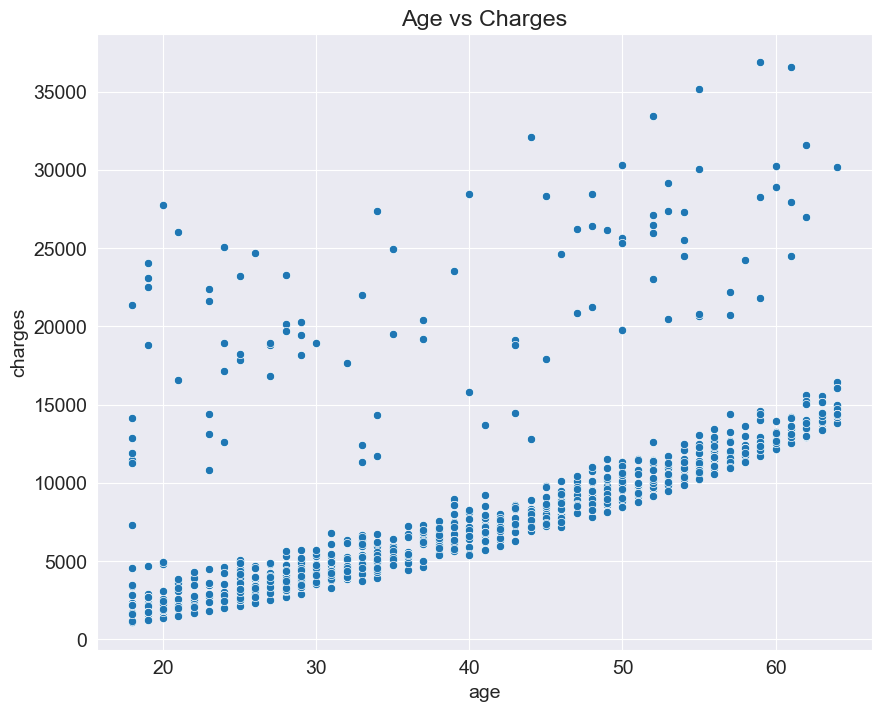

In [30]:
plt.title("Age vs Charges")
sns.scatterplot(x="age", y="charges", data=non_smoker_df)

we will find regression coefficients for each of the features


In [38]:
def estimate_charges(age, w, b):
    return w * age + b

In [39]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, 50, 100)

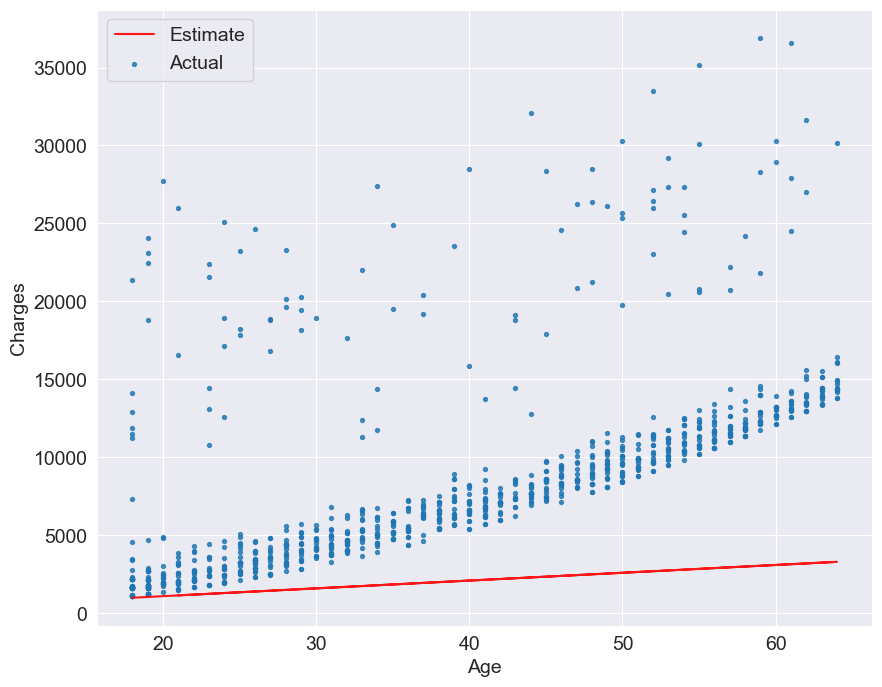

In [40]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, "r", alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])

## Loss functions

we can compare out model's predictions with the actual targets using this method


In [41]:
import numpy as np

In [42]:
# root mean squared error
def rmse(targets, predictions):
    return np.sqrt(np.mean((np.square(targets - predictions))))

In [44]:
# error in the previous prediction
rmse(target, estimated_charges)

8461.949562575493

In [46]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, "r", alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Prediction", "Actual"])
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4819.389528272652


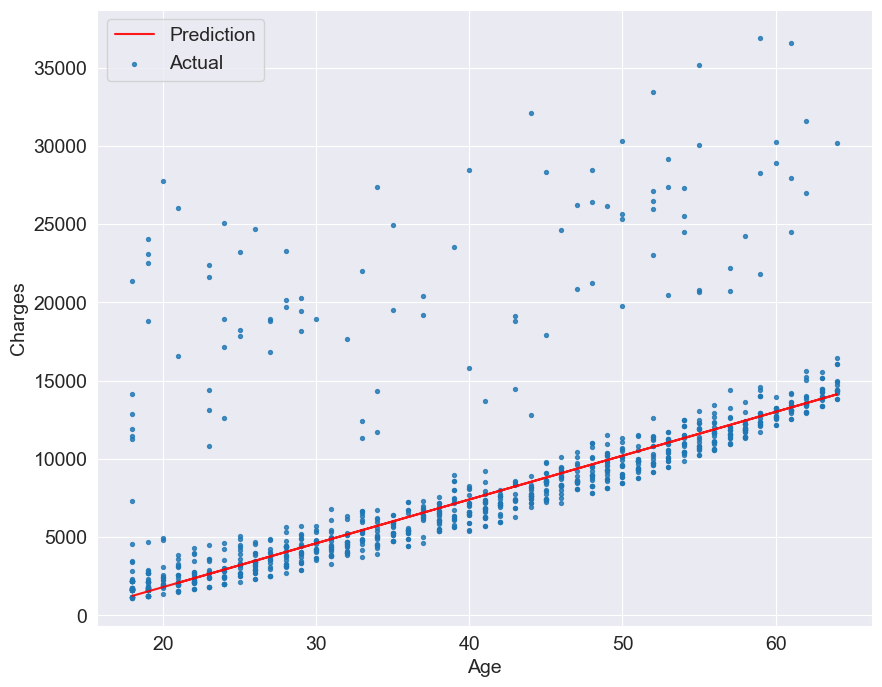

In [57]:
try_parameters(280, -3800)

this means may be we have to make the rmse minimum to make out regression line best for predicting the data

- gradient descent
- ordinary least squares


## Using scikit-learn


In [62]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
model.fit(non_smoker_df[["age"]], non_smoker_df.charges)

LinearRegression()

In [67]:
predictions = model.predict(non_smoker_df[["age"]])

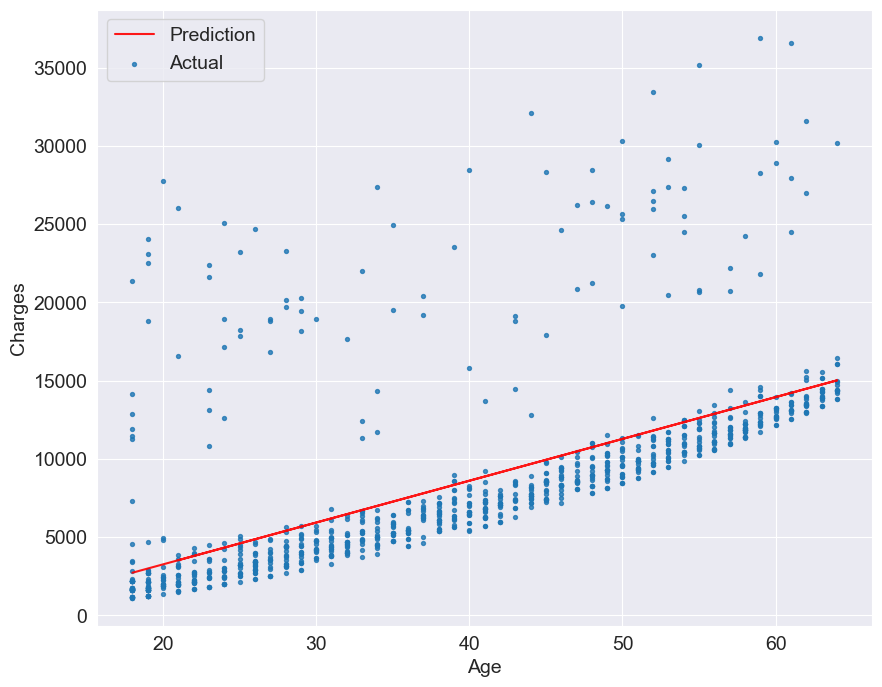

In [68]:
plt.plot(non_smoker_df["age"], predictions, "r", alpha=0.9)
plt.scatter(non_smoker_df["age"], non_smoker_df['charges'], s=8, alpha=0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Prediction", "Actual"]);

## Linear Regression using multiple features

In [70]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(f'RMSE: {loss}')

RMSE: 4662.3128354612945


In [71]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(f'RMSE: {loss}')

RMSE: 4608.470405038246


when we added children feature the error rate decreased, let's see on entire dataset

In [73]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(f'RMSE: {loss}') 

RMSE: 11355.317901125973


the error/loss is much higher, can improve this by having a categorical column for the target variable

In [74]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_codes'] = medical_df['smoker'].map(smoker_codes)

In [76]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(f'RMSE: {loss}') 

RMSE: 6056.439217188081


which is insanly lower than previous without categorical data

In [77]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_codes'] = medical_df['sex'].map(sex_codes)

In [79]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_codes']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(f'RMSE: {loss}') 

RMSE: 6056.100708754546


Now, for region column we have to use one hot encoding because we have more than one and different region.

In [80]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [81]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [82]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [84]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(f'RMSE: {loss}') 

RMSE: 6041.6796511744515


we have come a long way from ~10000 to ~6000